In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='svg'

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
iris, wine, mixed = load_datasets()

## Training iid

In [3]:
# regular training of each individually
dataset = prep_dataset(iris) 
model = StandardMLP(input_size=4, hidden_sizes=[8, 8, 8], output_size=3)
run_experiment(model, dataset, verbose=True,
               batch_size=10, epochs=60, lr=1e-2, weight_decay=0)

dataset = prep_dataset(wine) 
model = StandardMLP(input_size=4, hidden_sizes=[8, 8, 8], output_size=3)
run_experiment(model, dataset, verbose=True)

dataset = prep_dataset(mixed) 
model = StandardMLP(input_size=4, hidden_sizes=[8, 8, 8], output_size=6)
run_experiment(model, dataset, verbose=True)



Training Iris ...
Epoch: 12  Acc: 0.8500
Epoch: 24  Acc: 0.9333
Epoch: 36  Acc: 0.9417
Epoch: 48  Acc: 0.9667
Epoch: 60  Acc: 0.9667


Iris training set Acc: 0.9667
Iris test set Acc: 1.0000


Training Wine ...
Epoch: 12  Acc: 0.8750
Epoch: 24  Acc: 0.9333
Epoch: 36  Acc: 0.9417
Epoch: 48  Acc: 0.9750
Epoch: 60  Acc: 0.9833


Wine training set Acc: 0.9833
Wine test set Acc: 1.0000


Training Mixed ...
Epoch: 12  Acc: 0.6917
Epoch: 24  Acc: 0.8000
Epoch: 36  Acc: 0.8125
Epoch: 48  Acc: 0.8042
Epoch: 60  Acc: 0.8042


Mixed training set Acc: 0.8042
Mixed test set Acc: 0.8000


## Continual Learning

In [4]:
# continual learning
datasets = prep_dataset([iris, wine], target_transform=True) 
model = StandardMLP(input_size=4, hidden_sizes=[8, 8, 8], output_size=6)
run_experiment(model, datasets, verbose=True)



Training Iris ...
Epoch: 12  Acc: 0.8917
Epoch: 24  Acc: 0.9750
Epoch: 36  Acc: 0.9750
Epoch: 48  Acc: 0.9917
Epoch: 60  Acc: 0.9917


Training Wine ...
Epoch: 12  Acc: 0.3250
Epoch: 24  Acc: 0.9250
Epoch: 36  Acc: 0.9500
Epoch: 48  Acc: 0.9500
Epoch: 60  Acc: 0.9667


Wine training set Acc: 0.9667
Wine test set Acc: 0.9333


Iris training set Acc: 0.0000
Iris test set Acc: 0.0000


In [5]:
# adding loops
datasets = prep_dataset([iris, wine], target_transform=True) 
model = StandardMLP(input_size=4, hidden_sizes=[8, 8, 8], output_size=6)
run_experiment(model, datasets, verbose=False, num_loops=20)



Wine training set Acc: 0.9917
Wine test set Acc: 0.9000


Iris training set Acc: 0.0750
Iris test set Acc: 0.0333


## Adding a task embedding

In [6]:
# continual learning with task embedding
datasets = prep_dataset([iris, wine], target_transform=True, embed_task=True) 
model = StandardMLP(input_size=6, hidden_sizes=[8, 8, 8], output_size=6)
run_experiment(model, datasets, verbose=True)



Training Iris ...
Epoch: 12  Acc: 0.9667
Epoch: 24  Acc: 0.9750
Epoch: 36  Acc: 0.9750
Epoch: 48  Acc: 0.9750
Epoch: 60  Acc: 0.9833


Training Wine ...
Epoch: 12  Acc: 0.6417
Epoch: 24  Acc: 0.9583
Epoch: 36  Acc: 0.9667
Epoch: 48  Acc: 0.9750
Epoch: 60  Acc: 0.9583


Wine training set Acc: 0.9583
Wine test set Acc: 1.0000


Iris training set Acc: 0.0000
Iris test set Acc: 0.0000


In [7]:
# adding loops
datasets = prep_dataset([iris, wine], target_transform=True, embed_task=True) 
model = StandardMLP(input_size=6, hidden_sizes=[8, 8, 8], output_size=6)
run_experiment(model, datasets, verbose=False, num_loops=20)



Wine training set Acc: 0.9833
Wine test set Acc: 0.9667


Iris training set Acc: 0.0500
Iris test set Acc: 0.0333


## Again, but with dendrites

<img src="./dendriticMLP-small.png">

In [8]:
# continual learning with task embedding and dendrites
datasets = prep_dataset([iris, wine], target_transform=True, embed_task=True) 
model = DendriticMLP(input_size=4, dim_context=2, hidden_sizes=[8, 8, 8], output_size=6)
run_experiment(model, datasets, verbose=True)



Training Iris ...
Epoch: 12  Acc: 0.4500
Epoch: 24  Acc: 0.8917
Epoch: 36  Acc: 0.9167
Epoch: 48  Acc: 0.9417
Epoch: 60  Acc: 0.9417


Training Wine ...
Epoch: 12  Acc: 0.0000
Epoch: 24  Acc: 0.3583
Epoch: 36  Acc: 0.9667
Epoch: 48  Acc: 0.9667
Epoch: 60  Acc: 0.9667


Wine training set Acc: 0.9667
Wine test set Acc: 0.9333


Iris training set Acc: 0.0000
Iris test set Acc: 0.0000


In [9]:
# adding loops
datasets = prep_dataset([iris, wine], target_transform=True, embed_task=True) 
model = DendriticMLP(input_size=4, dim_context=2, hidden_sizes=[8, 8, 8], output_size=6)
run_experiment(model, datasets, num_loops=20)



Wine training set Acc: 1.0000
Wine test set Acc: 1.0000


Iris training set Acc: 0.9500
Iris test set Acc: 0.9333


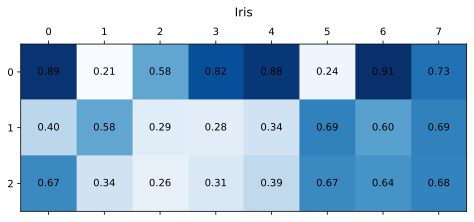

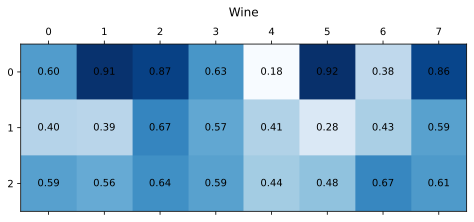

In [10]:
plot_activations(model, datasets)

## Is it a fair comparison?

In [11]:
# How many extra weights?

# manual calculation
standard_mlp_params_count = 6*8 + 8*8 + 8*8 + 8*6 + (8+8+8+6)
print(f"Standard MLP: {standard_mlp_params_count}")
dendritic_mlp_params_count = 4*8 + 8*8 + 8*8 + 8*6 + (8+8+8+6) + 8*(5*2)/2 * 3
print(f"Dendritic MLP: {dendritic_mlp_params_count}")

# sanity check
from nupic.research.frameworks.pytorch.model_utils import count_nonzero_params
model = StandardMLP(input_size=6, hidden_sizes=[8, 8, 8], output_size=6)
dendrites_model = DendriticMLP(input_size=4, dim_context=2, hidden_sizes=[8, 8, 8], output_size=6)
print(f"\nStandard MLP: {count_nonzero_params(model)}")
print(f"Dendritic MLP: {count_nonzero_params(dendrites_model)}")

# larger MLP with more weights than dendritic
standard_mlp_params_count = 6*20 + 8*20 + 8*20 + 8*6 + (8+8+8+6)
print(f"\nStandard Large MLP: {standard_mlp_params_count}")

Standard MLP: 254
Dendritic MLP: 358.0

Standard MLP: (254, 254)
Dendritic MLP: (478, 358)

Standard Large MLP: 518


In [12]:
# adding loops, 5x the capacity of regular MLP
datasets = prep_dataset([iris, wine], target_transform=True, embed_task=True) 
model = StandardMLP(input_size=6, hidden_sizes=[20, 20, 20], output_size=6)
run_experiment(model, datasets, verbose=False, num_loops=20)



Wine training set Acc: 1.0000
Wine test set Acc: 0.9333


Iris training set Acc: 0.0083
Iris test set Acc: 0.0000


## How many segments do we need?

In [14]:
# Testing with 1 segment - it also learns
datasets = prep_dataset([iris, wine], target_transform=True, embed_task=True) 
model = DendriticMLP(input_size=4, dim_context=2, hidden_sizes=[8, 8, 8], output_size=6, num_segments=(1,1,1))
run_experiment(model, datasets, num_loops=20)



Wine training set Acc: 0.9833
Wine test set Acc: 0.9667


Iris training set Acc: 0.9417
Iris test set Acc: 0.9667


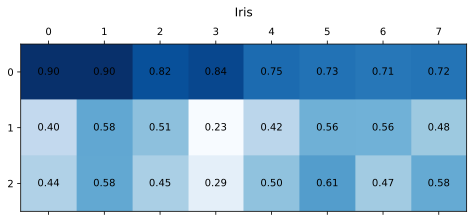

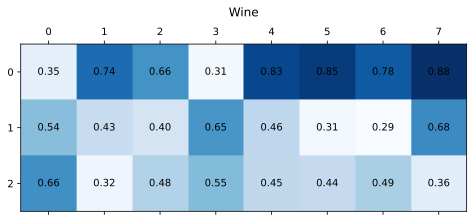

In [15]:
plot_activations(model, datasets)

In [16]:
# Testing with 20 segments
datasets = prep_dataset([iris, wine], target_transform=True, embed_task=True) 
model = DendriticMLP(input_size=4, dim_context=2, hidden_sizes=[8, 8, 8], output_size=6, num_segments=(20,20,20))
run_experiment(model, datasets, num_loops=20)



Wine training set Acc: 0.9833
Wine test set Acc: 0.9667


Iris training set Acc: 0.9833
Iris test set Acc: 0.9000


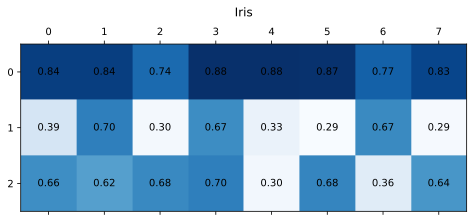

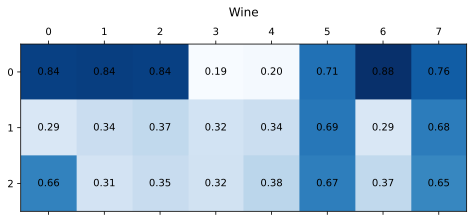

In [17]:
plot_activations(model, datasets)